# COGS 118A - **Project Check Point**


# Names

- Kareema Kilani
- Rich Liu
- Ramsey Cervantes
- Abigail Sawtell
- Joshua Suh

# **Abstract** 

We will be analyzing key indicators of heart disease in order to classify individuals who are at risk of developing heart disease. Factors like genetics, environmental impact, and personal habits all play a role in whether an individual will develop heart disease. Being able to identify which individuals have a high likelihood of developing heart disease using these factors is really helpful for early detection and preventative care. Additionally, our goal is to create a model that can correctly identify individuals who are likely to develop heart disease that may not have some of the main indicators like smoking, BMI, etc. Being able to identify these individuals will prevent them from going undetected using traditional screening methods and thus being unable to take steps to treat their heart disease. The factors in our dataset are a combination of continuous features, like age, and categorical data, like whether an individual smokes or not, which we will be one-hot encoded. We will be using a combination of multiple classification models, like SVM and random forest, to find the model with the highest accuracy of being able to identify whether an individual has heart disease. Performance of our project will be the accuracy of our model measured against a training set that includes the true status on whether the individual has heart disease or not.


# **Background**

A recent study, “Heart Disease Diagnosis and Prediction Using Machine Learning and Data Mining Techniques: A Review” focuses on how we live in a day and age where data mining techniques from the healthcare industry are producing massive amounts of data but are not effectively used and often wasted. <a name="sota"></a>[<sup>[1]</sup>](#sotanote) The reviews consisted of summaries of 35 studies exploring the “computational methods to predict heart diseases.” The datasets used were from a variety of institutions, most common were machine learning repositories of UC Irvine, survey, Cleveland Heart Disease Database, survey data, and publicly available hospital data.

The review first covers some popular data mining algorithms and data mining tools used for the data analysis purpose used for heart disease prediction that are used throughout studies.

**Data Mining Algorithms**: 

*   Decision Trees: C4.5, ID3, J48, K-means Algorithm, Support Vector Machine (SVM) , Naive Bayes (NB), Artificial Neural Network (ANN), CART - Classification and Regression Trees methodology, Random Forest, and Regression, A-Priori Algorithms, Fuzzy Logic, and Association Rules

**Data Mining Tools:**

*   Waikato Environment for Knowledge Learning (WEKA), RapidMiner, TANAGRA, Apache Mahout, MATLAB, Java, C, and Orange

The review dives into some techniques that were of interest to our group most notably, SVM and random forest. We wanted to look into the studies from the review that apply random forest and SVM. The first study used a combination of mainly (SVM), MLP neural network architecture, and artificial neural network (ANN).<a name="sota"></a>[<sup>[2]</sup>](#sotanote) They used 13 variables consisting of age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting ECG, maximum heart rate, exercise-induced angina, old peak, slope, number of vessels colored, and thal. It’s important to mention that the data they use is mainly numerical data that attribute to the tests taken from their physician versus our dataset which is mostly demographic and daily habitual data. 

Support Vector Machine classifiers predicted the presence of heart disease or absence of heart disease with 80.41% accuracy 
Artificial Neural Network classifiers  the data into 5 clusters of heart disease with 97.5% accuracy
 
They conclude by explaining that physicians should be able to utilize their methods in this study in any clinic to assist with creating accurate decision support systems.

A similar study used the same dataset including two other datasets but deployed different methods, including logistic regression, random forest, and SVM <a name="sota"></a>[<sup>[3]</sup>](#sotanote) The goal was to apply the different methods across all the datasets to determine the highest accuracy. Random forest scored between 74% to 84%,  Logistic regression scored 79% to 80%, and SVM scored 75% to 86% between all the datasets. They concluded “only a marginal success is achieved in the creation of a predictive model for heart disease patients and hence there is a need for combinational and more complex models to increase the accuracy of the predicting the early onset of heart disease”

Some of underlying trends identified throughout their research were: 1. The disease can be kept under control and be treated if it is detected early. 2. Excercising daily and removing unhealthy habits at the earliest can lead to positive health indications. 3. Individuals who have indicated tobacco consumption and unhealthy diets displayed higher chances of stroke and heart diseases. <a name="sota"></a>[<sup>[4]</sup>](#sotanote)

The study concludes that, “These works show that rather than applying a single mining technique on a data set, results are far better if a collection of mining techniques are used.” The most common classifiers used in these studies were Decision trees, Naïve Bayes, artificial neural networks, association rule mining, and fuzzy logic, and many combinations and permutations based off of them. However, while these classification techniques are integral parts to creating an optimal prediction system, they noticed that prepatory works, such as data cleaning and pruning techniques, were less emphasized in these studies. The omission of these techniques may lead to different results when reproducing a model, so they suggests that the data preparation should be documented more to ensure the accuracy of the models. 


# **Problem Statement**

Given factors like demographics, habits, and family history we will be able to use a pipeline of classification models, including SVM and random forest, to determine if an individual has heart disease or not. Our goal is to develop a model that can quickly and accurately determine wheter an individual has heart disease. There have been a variety of factors that have been linked to heart disease, so we can weight these factors and thus be able to calculate whether, based on our model, we expect an individual to have heart disease. We'll be able to measure the accuracy of our model by classifying a group of test individuals and comparing the model classification to their actual heart disease status. We can retrain the model until we are satisfied with the test set accuracy. Heart disease is a leading cause of death and being able to quickly and accurately screen patients  for heart disease could potentiall save many lives by detecting heart disease earlier and in individuals who may not present the typical risk factors.

# **Data**



We plan on using the Personal Key Indicators of Heart Disease dataset
(https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
which contains 18 variables and 300k+ observations. Each observation consists of a participant's response to a question regarding their health; these observations include categorical, ordinal, real valued responses. One critical variable we will be looking at is Heart Disease which is respresented as a Yes/No response and we will use this to help test our accuracy. The dataset is already cleaned and ready for use in our project.
  
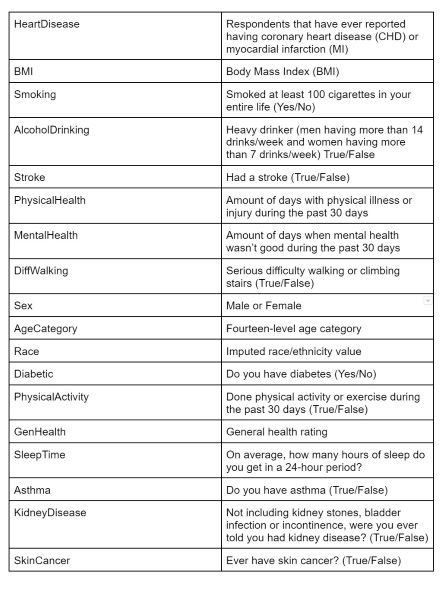

### **Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import io
#packages used later for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
# from google.colab import files
drive.mount('/content/drive', force_remount=True)
# uploaded = files.upload()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder 

Mounted at /content/drive


### **Import and Cleaning Data**

In [ ]:
#import csv
raw_df = pd.read_csv("/content/drive/MyDrive/Cogs 118A/heart_2020_cleaned.csv")
# raw_df = pd.read_csv(io.BytesIO(uploaded['heart_2020_cleaned.csv']))

#raw_df = pd.read_csv("/content/drive/MyDrive/COGS 118A/heart_2020_cleaned.csv")

#Converting Age Category to be numeircal value by the first value in that group 
raw_df = raw_df.replace({'AgeCategory': {'18-24': 18, '25-29': 25, '30-34': 30, '35-39': 35,
                                 '40-44': 40, '45-49': 45, '50-54': 50,'55-59':55,
                                 '60-64': 60, '65-69':65, '70-74': 70, '75-79':75,
                                 '80 or older':80 }})

#Converting 'Diabetic' column to binary by considering 
#'No, borderline diabetes' to be No (0)
#'Yes (during pregnancy)' to be Yes (1)

raw_df = raw_df.replace({'Diabetic': {'Yes': 1, 'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1}})


#Looping through the data to convert yes and no binary and sex to be binary 
for col in raw_df:
    
    if raw_df[col].dtypes == object and raw_df[col].nunique() == 2:
        
        raw_df = raw_df.replace({col: {'Yes': 1, 'No': 0}})
        raw_df = raw_df.replace({col: {'Male': 1, 'Female': 0}})

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Race' column 
encoder_df = pd.DataFrame(encoder.fit_transform(raw_df[['Race']]).toarray())

#renaming columns
encoder_df.columns = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']

df  = pd.DataFrame()

#merge one-hot encoded columns back with original DataFrame
df = raw_df.join(encoder_df)

#drop 'team' column
df.drop(['Race', 'GenHealth'], axis=1, inplace=True)

#view final df
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,30.0,0,0,55,...,5.0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,7.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,...,8.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,...,6.0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28.0,0.0,1,0,40,...,8.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,...,6.0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,...,5.0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,...,6.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,...,12.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
encoder_df = pd.DataFrame(encoder.fit_transform(raw_df[['Race']]).toarray())

raw_df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
#Check One Hot Encodeder was done correctly
for x in ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']:

  if df[x].value_counts()[1] == raw_df['Race'].value_counts()[x]:

    print(True)

#Checks all values are numerical 
df.dtypes

True
True
True
True
True
True


HeartDisease                        int64
BMI                               float64
Smoking                             int64
AlcoholDrinking                     int64
Stroke                              int64
PhysicalHealth                    float64
MentalHealth                      float64
DiffWalking                         int64
Sex                                 int64
AgeCategory                         int64
Diabetic                            int64
PhysicalActivity                    int64
SleepTime                         float64
Asthma                              int64
KidneyDisease                       int64
SkinCancer                          int64
American Indian/Alaskan Native    float64
Asian                             float64
Black                             float64
Hispanic                          float64
Other                             float64
White                             float64
dtype: object

In [ ]:
df.to_csv('final_heart.csv', index=False)

# **Proposed Solution**
The solution is to use supervised learning algorithms such as linear/mulitvariate regression, SVM with different kernels, and random forest to try to determine whether someone has heart disease or not. In order to determine the best algorithm for doing so, we will plot a confusion matrix in order to determine the recall, specificity, precision and accuracy of each model. With this information, we will able to choose the best performing model for this problem. We will be using the scikit-learn library for these methods. \\
There isn't a specific benchmark model for this particular dataset; however, since we have the true labels in this dataset, we can evaluate the performance against it.

# **Evaluation Metrics**

The evaluation metric used to quantify performance for the machine algorithms we use are going to be precision, specificity, recall, and accuracy. In our study, we will factor these variables into context in order to find the model with the best practical application. Each of these values will be calculated from confusion matrix created for each algorithm we implement. These metrics are appropriate for our problem domain of evaluting whether someone has a high likelihood of heart disease because it answers questions about accuracy, which is how many classifications the algorithm got correct compared to the true labels. \\
In addition, since we are dealing with a situation where a false negative would mean a patient who has heart disease is predicted to not have one, we will put closer attention to minimizing the false negative rate ($\frac{\text{false negative}}{\text{true positive + false negative}}$) when testing each model. 

To specify our metrics:
1. Precision is the ratio between true positives and the sum of true positives and false positives. \\
  * In our project's scope, precision answers the following: How many patients out of those who we predicted to have a heart disease, actually have a heart disease?
2. Specificity is the ratio between true negatives and the sum of true negative and false postive. 
  * In our project's scope, specifity answers the following question: Out of all the people who are healthy, how many of those did we correctly predict?
3. Recall is the ratio between true positives and the sum of true positives and false negatives.
  * In our project's scope, recall answers the following question: Out of all the people who have heart disease, how many of those did we correctly predict? 
 
Here is an example confusion matrix below.

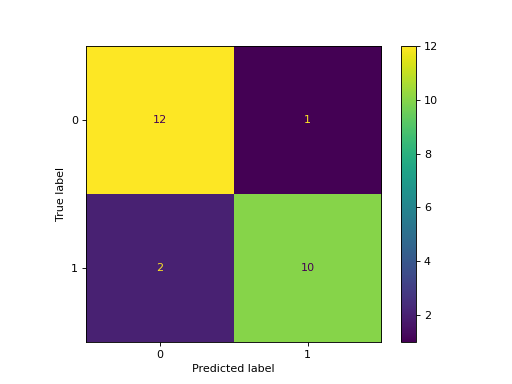

# **Preliminary results**
## EDA
### Visualizations of Continuous Data
Continuous Data: BMI, Physical Health, Mental Health, Sleep Time

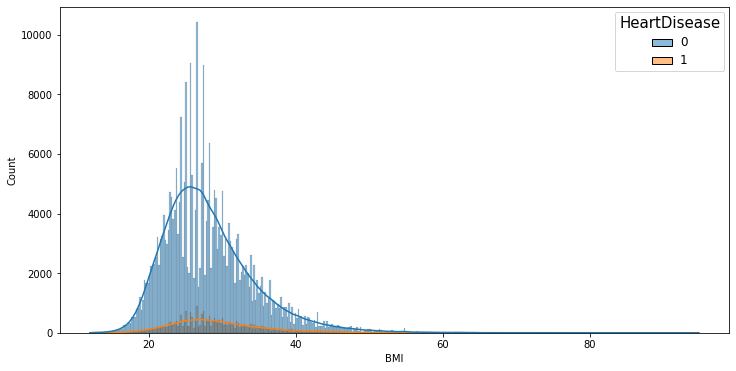

In [ ]:
#BMI histogram
BMI = sns.histplot(raw_df, x="BMI", hue = "HeartDisease", kde = True)
plt.setp(BMI.get_legend().get_texts(), fontsize='12') 
plt.setp(BMI.get_legend().get_title(), fontsize='15') 
plt.gcf().set_size_inches(12, 6)
plt.show()

We notice a spike in heart disease around the 25-30 BMI range from the plot. In general, there are more individuals who fall in this range so more investigation will need to be done to determine if the spike is due to some correlation between BMI and heart disease or due to the nature of the distribution.

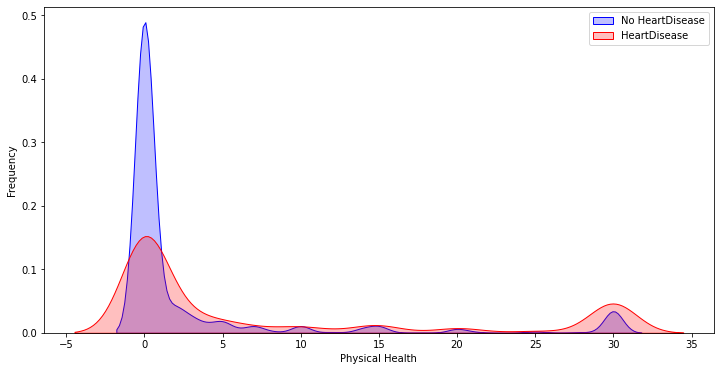

In [ ]:
#Physical Health plot
yes = raw_df[raw_df["HeartDisease"]==1]
no = raw_df[raw_df["HeartDisease"]==0]


fig, ax = plt.subplots(figsize = (12,6))
sns.kdeplot(no["PhysicalHealth"], shade = True, color="b", label="No HeartDisease", ax = ax)
sns.kdeplot(yes["PhysicalHealth"],shade = True, color="r", label="HeartDisease", ax = ax)
ax.set_xlabel("Physical Health")
ax.set_ylabel("Frequency")
ax.legend()

We notive that as days with physical illness or injury in the past 30 days increases, there tends to be more individuals that have heart disease than those that don't have heart disease. This could indicate that there exist some correlation between some physical illnesses or injury and heart disease.

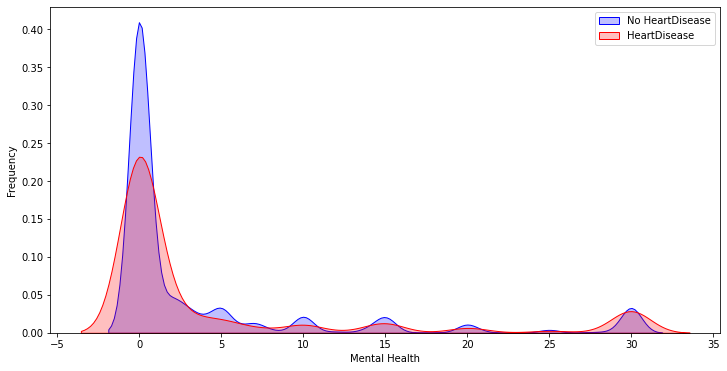

In [ ]:
#Mental Health plot
fig, ax = plt.subplots(figsize = (12,6))
sns.kdeplot(no["MentalHealth"], shade = True, color="b", label="No HeartDisease", ax = ax)
sns.kdeplot(yes["MentalHealth"],shade = True, color="r", label="HeartDisease", ax = ax)
ax.set_xlabel("Mental Health")
ax.set_ylabel("Frequency")
ax.legend()

The Mental Health plot if very similar to the Physical Health plot in that as the number of days where an individual's mental health has not been good in the past 30 days increases, there are nearly as many people with health disease as there are without heart disease. This suggest a possible correlation and further investigation will need to be done.

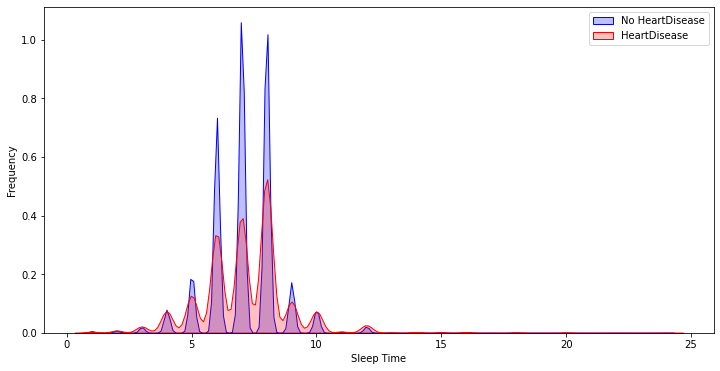

In [ ]:
#Sleep Time plot
fig, ax = plt.subplots(figsize = (12,6))
sns.kdeplot(no["SleepTime"], shade = True, color="b", label="No HeartDisease", ax = ax)
sns.kdeplot(yes["SleepTime"],shade = True, color="r", label="HeartDisease", ax = ax)
ax.set_xlabel("Sleep Time")
ax.set_ylabel("Frequency")
ax.legend()

Looking at individuals on each end of the Sleep Time spectrum, less than 5 and more than 9 hours, the plot shows that the number of individuals with heart disease is almost as many as the number of people without heart disease. This tells us that there may be a correlation between too much or too little sleep and heart disease. We notice that there are also potential outliers above 12 hours of sleep that will need to be investigated further.

### Visualizations of Categorical Data
Categorical Data: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer, Age Category

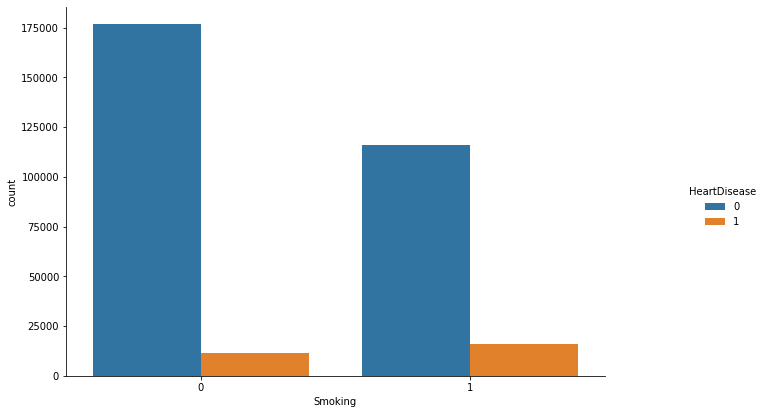

In [ ]:
#Smoking plot
Smoke = sns.catplot(x="Smoking", hue="HeartDisease", kind="count", data=raw_df)
plt.gcf().set_size_inches(12, 6)
plt.show()

We see that the there is a larger proportion of those who smoke that have heart disease than those who don't smoke and have heart disease, indicating a possible correlation.

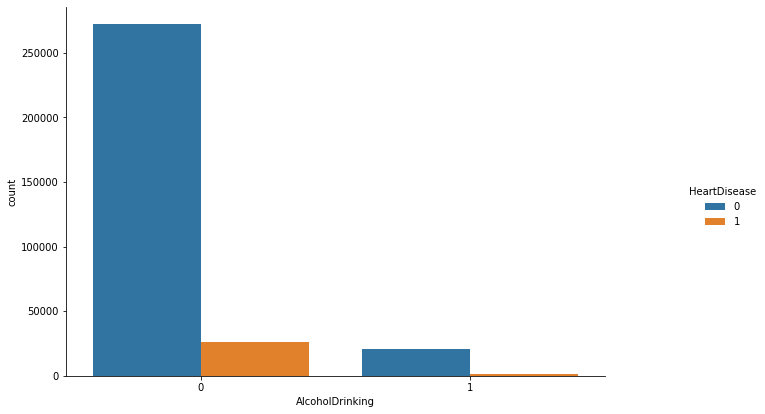

In [ ]:
#Alcohol plot
Alcohol = sns.catplot(x="AlcoholDrinking", hue="HeartDisease", kind="count", data=raw_df)
plt.gcf().set_size_inches(12, 6)
plt.show()

From this plot alone, it's hard to tell if there appears to be a possible correlation. Additionally, there are significantly more individuals included in the data that are not heavy drinkers, which may introdice some bias. 

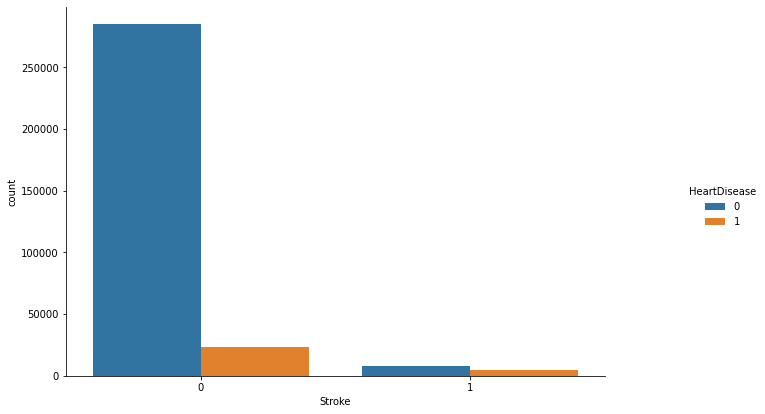

In [ ]:
#Stroke plot
Stroke = sns.catplot(x="Stroke", hue="HeartDisease", kind="count", data=raw_df)
plt.gcf().set_size_inches(12, 6)
plt.show()

It appears that there is a correlation between having a stroke and having heart disease since about half of those who have had a stroke also have heart disease. Additionally, there are significantly more individuals included in the data that have not had a stroke, which may introdice some bias.

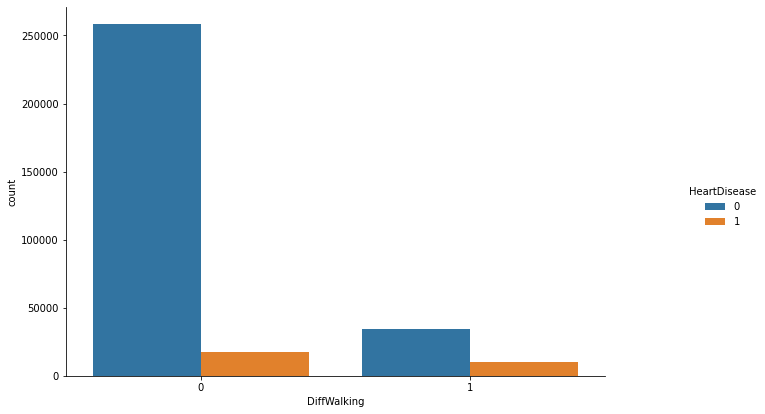

In [ ]:
#Difficulty Walking
DiffWalking = sns.catplot(x="DiffWalking", hue="HeartDisease", kind="count", data=raw_df)
plt.gcf().set_size_inches(12, 6)
plt.show()

There appears to be a higher proportion of those who have difficulty walking that have heart disease and those who don't have difficulty walking and have heart disease, which may suggest a correlation. We can infer that there may be some underlying health conditions or other factors that can explain the difficulty walking, so further exploration may be able to uncover which, if any, of these factors, are most highly correlated with heart disease.

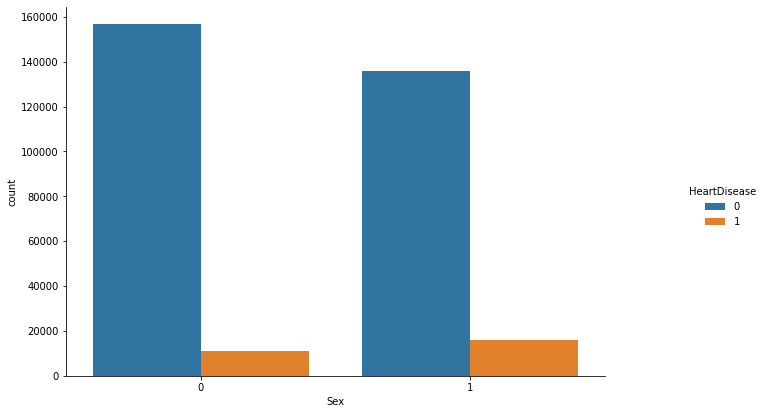

In [ ]:
#Sex plot
Sex = sns.catplot(x="Sex", hue="HeartDisease", kind="count", data=raw_df)
plt.gcf().set_size_inches(12, 6)
plt.show()

There seems to be a slightly larger proportion of Males with heart disease than Females which heart disease, suggesting a possible correlation. Again, it is possible that there could be other factors that can explain why there appears to be a correlation, so further investigation will need to be done.

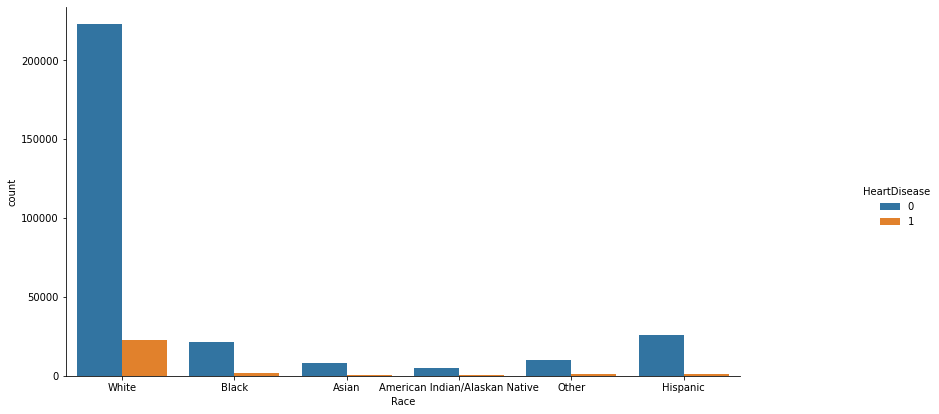

In [ ]:
#Race plot
race = sns.catplot(x="Race", hue="HeartDisease", kind="count", data=raw_df)
plt.gcf().set_size_inches(15, 6)
plt.show()

From this plot alone it's hard to see evidence of any sort or correlation between Race and heart disease. However, we do notice that the vast majority of individuals included in the data are White. The substantial difference may introduce some bias that we should be careful of acknowledging going forward. 

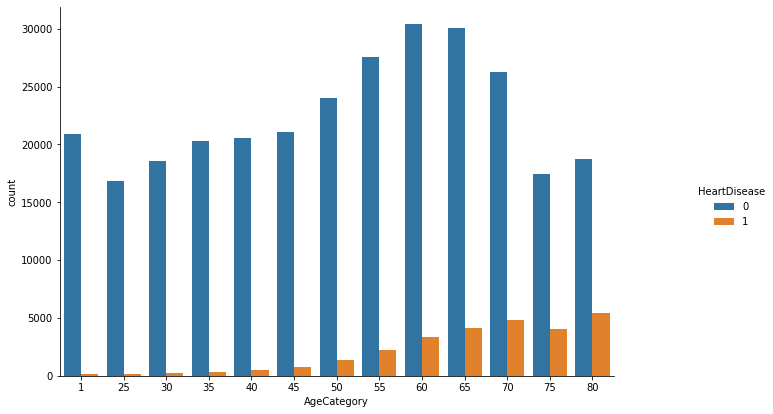

In [ ]:
#Age plot
age = sns.catplot(x="AgeCategory", hue="HeartDisease", kind="count", data=raw_df)
plt.gcf().set_size_inches(12, 6)
plt.show()

It appears that as age increases, there is a higher proportion of those with heart disease, with the highest proportion of heart disease coming from the oldest category. 

# **Decision Tree**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'HeartDisease'], df['HeartDisease'], test_size=0.33, random_state=42)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('dt_cls', DecisionTreeClassifier())])
param_grid = dict(dt_cls__criterion = ['gini', 'entropy'], dt_cls__max_depth = [2,4,6,8,10,12])
gscv = GridSearchCV(pipe, param_grid,n_jobs=-1,verbose=10)
gscv.fit(X_train, y_train)
print('Best Accuracy: ' + str(gscv.score(X_test, y_test)))
best_param = dict(criterion=gscv.best_estimator_.get_params()['dt_cls__criterion'],max_depth=gscv.best_estimator_.get_params()['dt_cls__max_depth'])
print('best parameters: ',best_param)
clf_pipe=Pipeline([('scaler', StandardScaler()), ('dt_cls', DecisionTreeClassifier(**best_param))])
clf_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Accuracy: 0.9137615722096406
best parameters:  {'criterion': 'gini', 'max_depth': 4}


Pipeline(steps=[('scaler', StandardScaler()),
                ('dt_cls', DecisionTreeClassifier(max_depth=4))])

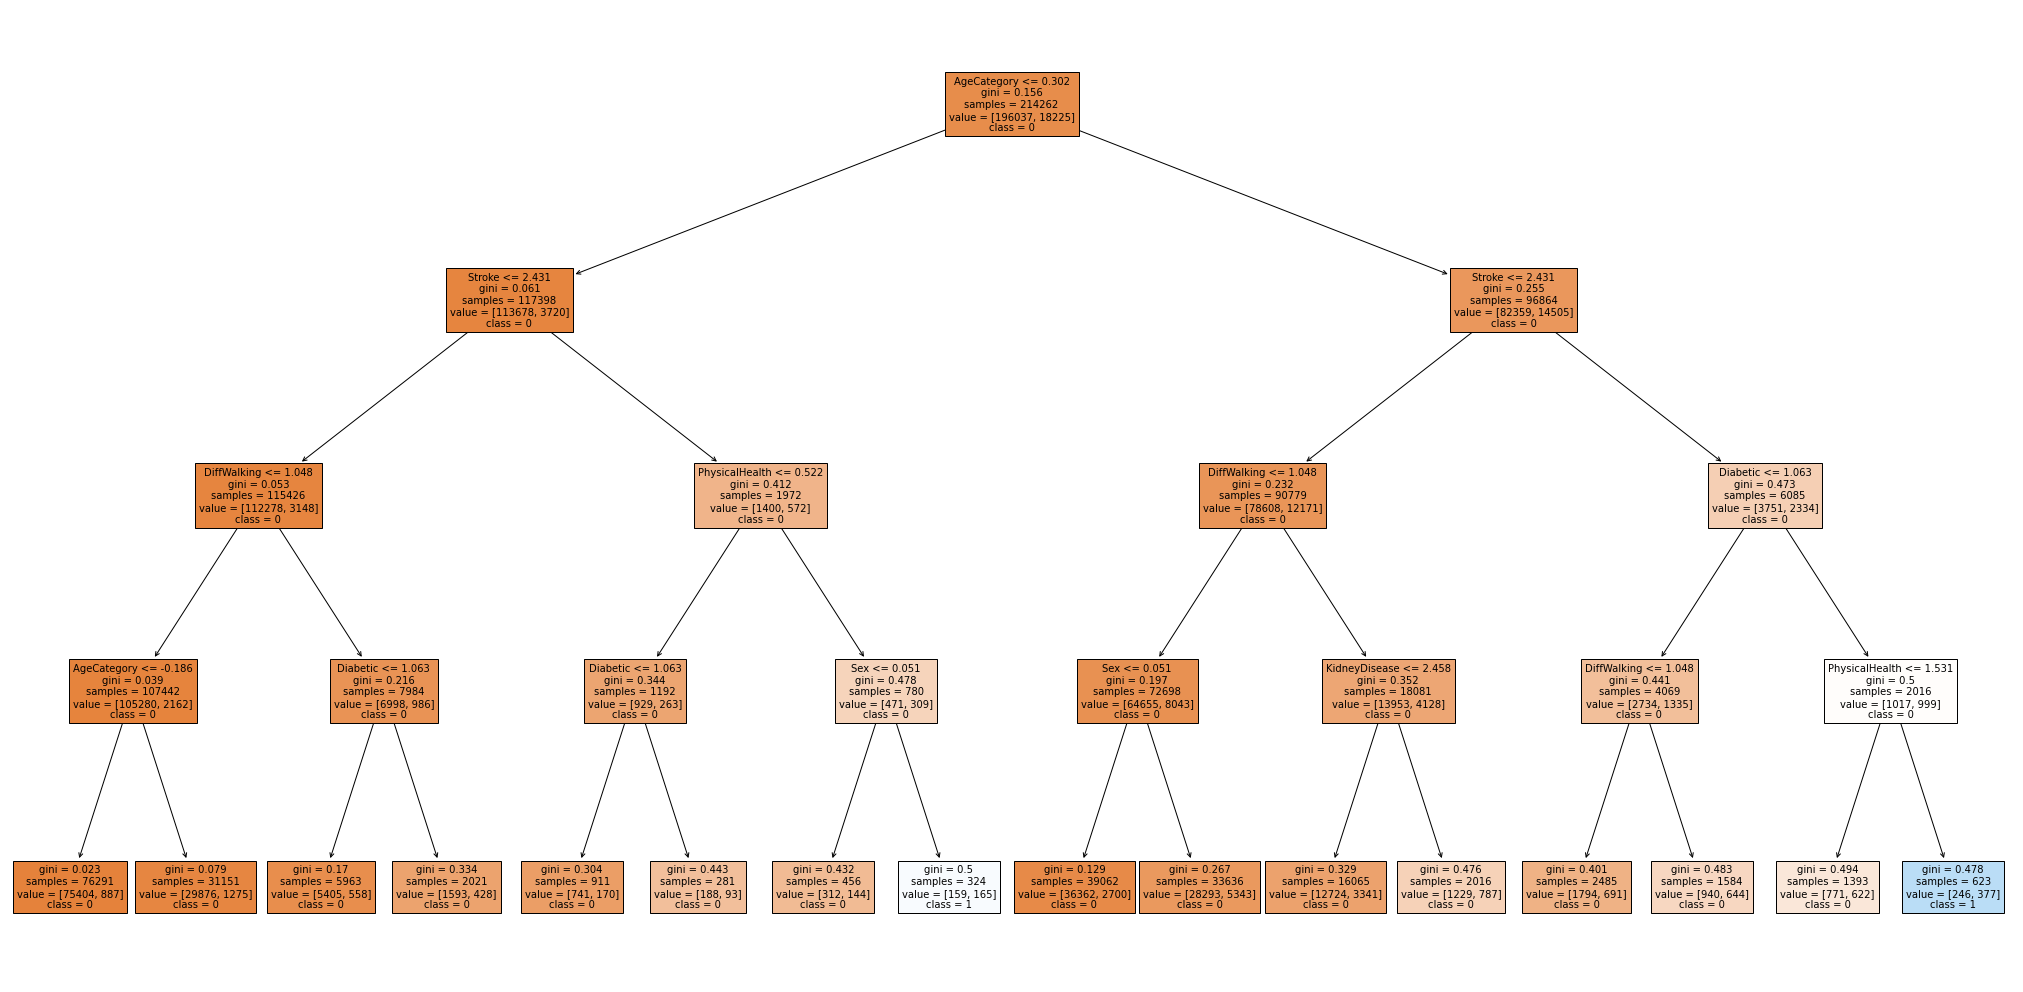

In [ ]:
plt.figure(figsize=(36,18))  # set plot size (denoted in inches)
plot_tree(clf_pipe['dt_cls'], fontsize=10, feature_names=df.loc[:, df.columns != 'HeartDisease'].columns, class_names=["0","1"], filled=True)
plt.show()

Here is an decision tree with the best parameters: like whether to use gini or entropy for the optimal split and what is the best tree depth. It was determined from gridsearchcv with default crossvalidation parameter of 5 folds. It was trained on scaled data due to certain values being larger than others like weight and age isn't inherently more important than other variables such as sex which is 0 or 1. The accuracy for the model trained on the best parameters found is 0.9137. We plotted the decision tree to visualize it, we plan to explore inverse_transform to see if we can get the original data which would make more sense when looking at the decision tree. 

# **Ethics & Privacy**

We will be using personal health data which has major privacy and ethic concerns. The dataset we have chosen doesn't include any names or identifiable attributes for the participants, which mitigates some privacy concerns. For future use of our model, all identifiable information would need to me taken out before using personal data. Lastly, the project deals with diagnosis of a medical condition and thus would have to follow all HIPAA standards. 

There is also a potential ethical concern if an individual is told by our model that they have heart disease but actually do not. This could create a health scare and the individual may have grounds to sue for emotional damages. Prior to any sort of implementation of our model, we would need to ensure a high level of accuracy to avoid the possibility of misdiagnosing a patient and creating unnecessary fear.

# **Team Expectations**

* *Everyone will contribute something valuable to the project*
* *We will be using Discord as out main method of communication*
* *Meetings will occur on Zoom and In-person, once to two times a week, as needed*
* *Although most of us have worked together on project, we plan on communicatling effectivly to avoid any conflicts, in conflicts occur we as a group can determing if the issue is small or large scale. Small scale issues can be handled internatlly within the group and large scale issue can be communitucated with a TA or professor to discuss further steps/action*
* *Decsions made will be made by majority votes, however we as a group can come to a cooperative descison*
* *We will follow a schedule based on deadlines instilled from the course*
* *We will provide constructive feedback and discuss any disagreements as a group*


# Project Timeline Proposal

We've discussed that this will be our rough timeline with additional smaller check in meetings throughout the project as needed. Group member assignments are also rough outlines for now.

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/20  |  3 PM |  Brainstorm topics/questions (all); Search for datasets (all) | Determine best form of communication; Decide on Heart Disease as topic; discuss hypothesis; begin background research | 
| 4/24  |  8 PM |  Begin assigned project proposal sections (all) | Discuss and finish project proposal; Assign group members to lead each specific part   | 
| 5/9  | 6 PM  | Import & Wrangle Data ,do some EDA (Rich & Kareema) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
|5/13  | Before 11:59 PM | Finalize Checkpoint | Turn in Checkpoint    |
| 5/14 | 10 AM | Continue working on assigned part | Check in meeting, see if we're on track |
| 5/18  | 3 PM  | Finalize wrangling/EDA; Begin programming SVM and random forest for project (Abigail, Ramsey & Joshua) | Discuss/edit project code; Reassign tasks if necessary |
| 5/30 |  9 PM | Work on individual assignment code for models | Model selection and implementation; Complete project |
| 6/2  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (all)| Discuss/edit full project |
|6/6 | 3 PM | Edit/finalize project | Final check in meeting to finalize project |
| 6/08  | Before 11:59 PM  | NA | Turn in Final Project  |

# **Footnotes**
<a name="lorenznote"></a>1.[^](#lorenz): Pytlak, Kamil. “Personal Key Indicators of Heart Disease.” Kaggle, Centers for Disease Control and Prevention, 16 Feb. 2022, https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. birds-arent-real-gen-z-misinformation.html<br> 

<a name="admonishnote"></a>2.[^](#admonish): Asha Rajkumar, and Mrs G. Sophia Reena, 2010, “Diagnosis of Heart Disease using Data Mining Algorithms”,Global Journal of Computer Science and Technology,Vol. 10,Issue 10, pp.38-43, September. <br> 

<a name="admonishnote"></a>3.[^](#admonish): M. Gudadhe, K. Wankhade and S. Dongre, "Decision support system for heart disease based on support vector machine and Artificial Neural Network," 2010 International Conference on Computer and Communication Technology (ICCCT), 2010, pp. 741-745, doi: 10.1109/ICCCT.2010.5640377.<br>

<a name="admonishnote"></a>4.[^](#admonish): Serdar AYDIN, Meysam Ahanpanjeh,and Sogol Mohabbatiyan,February 2016, “Comparison And Evaluation of Data Mining Techniques in the Diagnosis of Heart Disease”, International Journal on Computational Science & Applications (IJCSA), Vol. 6,No.1, pp. 1-15. <br> 


# **Citations & References**

Pytlak, Kamil. “Personal Key Indicators of Heart Disease.” Kaggle, Centers for Disease Control and Prevention, 16 Feb. 2022, https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. 

Asha Rajkumar, and Mrs G. Sophia Reena, 2010, “Diagnosis of Heart Disease using Data Mining Algorithms”,Global Journal of Computer Science and Technology,Vol. 10,Issue 10, pp.38-43, September.

M. Gudadhe, K. Wankhade and S. Dongre, "Decision support system for heart disease based on support vector machine and Artificial Neural Network," 2010 International Conference on Computer and Communication Technology (ICCCT), 2010, pp. 741-745, doi: 10.1109/ICCCT.2010.5640377.

Serdar AYDIN, Meysam Ahanpanjeh,and Sogol Mohabbatiyan,February 2016, “Comparison And Evaluation of Data Mining Techniques in the Diagnosis of Heart Disease”, International Journal on Computational Science & Applications (IJCSA), Vol. 6,No.1, pp. 1-15.

